In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import plotly.offline as pyoff
import plotly.graph_objs as go
import plotly.graph_objs as go

In [ ]:
fake = pd.read_csv('/content/drive/My Drive/Colab Datasets/Fake.csv')
real = pd.read_csv('/content/drive/My Drive/Colab Datasets/True.csv')

Data Cleaning

In [ ]:
fake['Target']=1
real['Target']=0

frames = [fake, real]

df = pd.concat(frames)
df

,title,text,subject,date,Target
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
...,...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017",0
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017",0
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017",0
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017",0


removing urls

In [ ]:
patternDel = "http"
filter1 = df['date'].str.contains(patternDel)

df = df[~filter1]

pattern = "Jan|Feb|Mar|Apr|May|Jun|Jul|Aug|Sep|Oct|Nov|Dec"
filter2 = df['date'].str.contains(pattern)

df=df[filter2]

df['date'] = pd.to_datetime(df['date'])

df_sub=df.groupby(['subject', 'Target'])['text'].count()

df_sub

subject          Target
Government News  1          1568
Middle-east      1           778
News             1          9050
US_News          1           783
left-news        1          4456
politics         1          6836
politicsNews     0         11272
worldnews        0         10145
Name: text, dtype: int64

In [ ]:
df_sub = df_sub.unstack().fillna(0)
df_sub

Target,0,1
subject,,
Government News,0.0,1568.0
Middle-east,0.0,778.0
News,0.0,9050.0
US_News,0.0,783.0
left-news,0.0,4456.0
politics,0.0,6836.0
politicsNews,11272.0,0.0
worldnews,10145.0,0.0


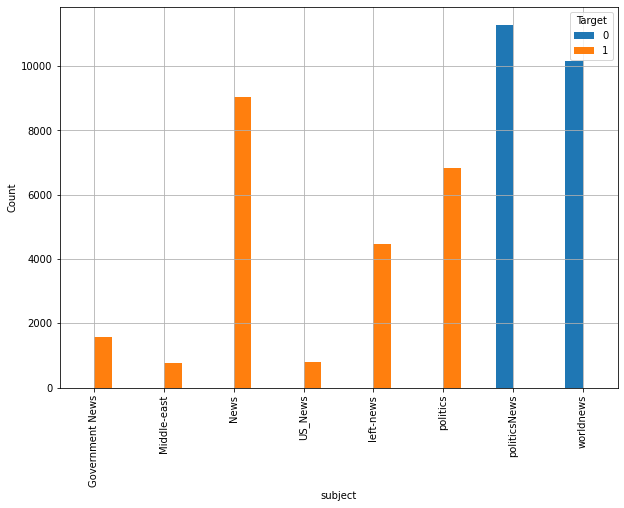

In [ ]:
# Visualize this data in bar plot
ax = (df_sub).plot(
kind='bar',
figsize=(10, 7),
grid=True
)
ax.set_ylabel('Count')
plt.show()

In [ ]:
df_sub['Count']=df_sub[0]+df_sub[1]

In [ ]:
import plotly.graph_objects as go

labels = df_sub.index
values = df_sub['Count']

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])
fig.show()


In [ ]:
df_=df.copy()

df_=df_.sort_values(by=['date'])

df_=df_.reset_index(drop=True)

df_

,title,text,subject,date,Target
0,FLASHBACK: KING OBAMA COMMUTES SENTENCES OF 22...,Just making room for Hillary President Obama t...,politics,2015-03-31,1
1,HILLARY RODHAM NIXON: A CANDIDATE WITH MORE BA...,The irony here isn t lost on us. Hillary is be...,politics,2015-03-31,1
2,BENGHAZI PANEL CALLS HILLARY TO TESTIFY UNDER ...,Does anyone really think Hillary Clinton will ...,politics,2015-03-31,1
3,OH NO! GUESS WHO FUNDED THE SHRINE TO TED KENNEDY,Nothing like political cronyism to make your s...,politics,2015-03-31,1
4,WATCH DIRTY HARRY REID ON HIS LIE ABOUT ROMNEY...,"In case you missed it Sen. Harry Reid (R-NV), ...",politics,2015-03-31,1
...,...,...,...,...,...
44883,JUST IN: BADASS GENERAL JOHN KELLY Shoved Chin...,Just one more reminder of why President Trump ...,politics,2018-02-18,1
44884,GOTCHA! A Stammering John Podesta Stunned by a...,John Podesta is Hillary Clinton s former campa...,politics,2018-02-18,1
44885,WATCH: SNOWFLAKES ASKED Communist Party Platfo...,Ami Horowitz is fantastic! Check out this man ...,politics,2018-02-19,1
44886,MSNBC ANCHOR Flabbergasted at What Texas Teach...,If we protect every other government building ...,politics,2018-02-19,1


In [ ]:
df_1=df_[df_['Target']==1]

df_1=df_1.groupby(['date'])['Target'].count()

df_1=pd.DataFrame(df_1)

df_1['Target']

date
2015-03-31     8
2015-04-01     2
2015-04-02     1
2015-04-04     5
2015-04-05    13
              ..
2018-02-15     9
2018-02-16     8
2018-02-17     7
2018-02-18     7
2018-02-19     3
Name: Target, Length: 1010, dtype: int64

In [ ]:
df_0=df_[df_['Target']==0]

df_0=df_0.groupby(['date'])['Target'].count()

df_0=pd.DataFrame(df_0)

In [ ]:
plot_data = [
    go.Scatter(
        x=df_0.index,
        y=df_0['Target'],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
    ),
    go.Scatter(
        x=df_1.index,
        y=df_1['Target'],
        name='Fake'
    )
    
]
plot_layout = go.Layout(
        title='Day-wise',
        yaxis_title='Count',
        xaxis_title='Time',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
from wordcloud import WordCloud, STOPWORDS 

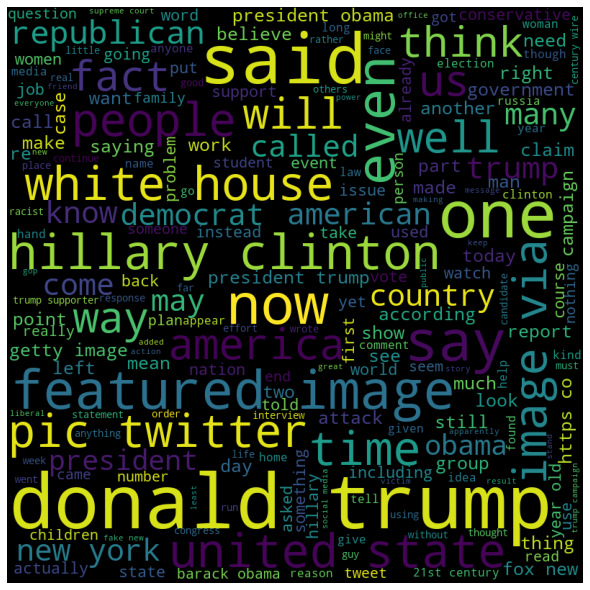

In [ ]:
#WordCloud for Fake News

comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['Target']==1]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

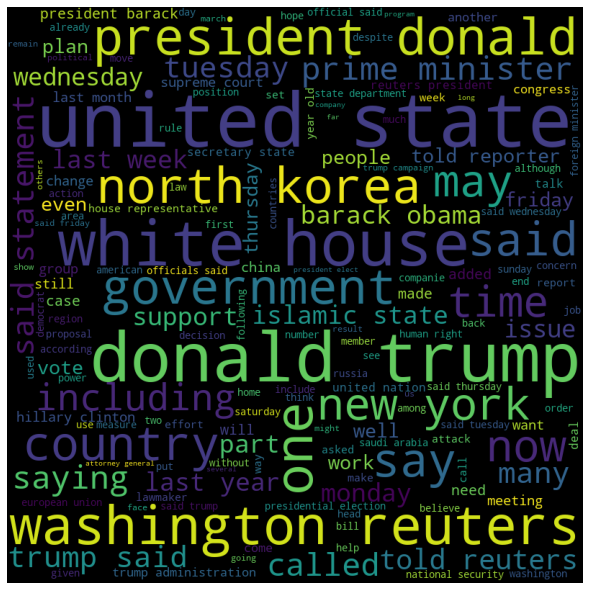

In [ ]:
#WordCloud for Real News
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in df[df['Target']==0]['text']: 
      
    # typecaste each val to string 
    val = str(val) 
  

    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

Combine Subject and Title and Text

In [ ]:
df_['news']=df_['subject']+' '+df_['title']+' '+df_['text']
df_['news'] = df_.apply(lambda x: x['news'].lower(),axis=1)
df_["news"] = df_['news'].str.replace('[^\w\s]','')
all_news=pd.DataFrame(pd.Series(' '.join(df_['news']).split()).value_counts())
allnews1=all_news.head(30)

30 most ocurring words

In [ ]:
plot_data = [
    go.Bar(
        x=allnews1.index,
        y=allnews1[0],
        name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = allnews1[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 words',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_news=pd.DataFrame(pd.Series(' '.join(df_[df_['Target']==1]['news']).split()).value_counts())
fake_news30=fake_news.head(30)




In [ ]:
#30 Most ocurring words in Fake news
plot_data = [
    go.Bar(
        x=fake_news30.index,
        y=fake_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = fake_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 words from Fake news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
#30 most occuring words in true news

real_news=pd.DataFrame(pd.Series(' '.join(df_[df_['Target']==0]['news']).split()).value_counts())
real_news30=real_news.head(30)


plot_data = [

    go.Bar(
        x=real_news30.index,
        y=real_news30[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = real_news30[0]
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 words from Real news',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Starting with Ngrams

In [ ]:
import nltk, re, string, collections
from nltk.util import ngrams

import re
import unicodedata
import nltk
nltk.download('all')
from nltk.corpus import stopwords

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package biocreative_ppi is already up-to-date!
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Package brown_tei is already up-to-date!
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Package cess_cat is already up-to-date!
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Package cess_esp is already up-to-date!
[nltk_data]    | Downloading packag

In [ ]:
def basic_clean(text):
  """
  A simple function to clean up the data. All the words that
  are not designated as a stop word is then lemmatized after
  encoding and basic regex parsing are performed.
  """
  wnl = nltk.stem.WordNetLemmatizer()
  stopwords = nltk.corpus.stopwords.words('english')
  text = (unicodedata.normalize('NFKD', text)
    .encode('ascii', 'ignore')
    .decode('utf-8', 'ignore')
    .lower())
  words = re.sub(r'[^\w\s]', '', text).split()
  return [wnl.lemmatize(word) for word in words if word not in stopwords]

In [ ]:
words = basic_clean(''.join(str(df_['news'].tolist())))

Bigrams from News

In [ ]:
bigram_all=(pd.Series(nltk.ngrams(words, 2)).value_counts())[:30]
bigram_all=pd.DataFrame(bigram_all)
bigram_all

,0
"(donald, trump)",24049
"(united, state)",18436
"(white, house)",15789
"(hillary, clinton)",9625
"(new, york)",8852
"(north, korea)",7251
"(president, donald)",6951
"(washington, reuters)",6489
"(image, via)",6194
"(prime, minister)",4821


In [ ]:
bg_a=bigram_all.copy()
bg_a['in']=bg_a.index
bg_a['in'] = bg_a.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

plot_data = [
    go.Bar(
        x=bg_a['in'],
        y=bg_a[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bigrams from News',
        yaxis_title='Count',
        xaxis_title='Word',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Tri-grams for news

In [ ]:
trigram_all=(pd.Series(nltk.ngrams(words, 3)).value_counts())[:30]
trigram_all=pd.DataFrame(trigram_all)
trigram_all['in']=trigram_all.index
trigram_all['in'] = trigram_all.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)
trigram_all

,0,in
"(president, donald, trump)",6743,"(president, donald, trump)"
"(president, barack, obama)",2853,"(president, barack, obama)"
"(u, president, donald)",2589,"(u, president, donald)"
"(washington, reuters, u)",2352,"(washington, reuters, u)"
"(donald, j, trump)",2160,"(donald, j, trump)"
"(new, york, time)",2068,"(new, york, time)"
"(21st, century, wire)",1904,"(21st, century, wire)"
"(j, trump, realdonaldtrump)",1692,"(j, trump, realdonaldtrump)"
"(black, life, matter)",1427,"(black, life, matter)"
"(george, w, bush)",1258,"(george, w, bush)"


In [ ]:
plot_data = [
    go.Bar(
        x=trigram_all['in'],
        y=trigram_all[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'blue'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 trigrams from News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

In [ ]:
fake_words = basic_clean(''.join(str(df_[df_['Target']==1]['news'].tolist())))

Finding top 30 most frequent Bi-grams from Fake News

In [ ]:
bigram_fake=(pd.Series(nltk.ngrams(fake_words, 2)).value_counts())[:30]
bigram_fake=pd.DataFrame(bigram_fake)

bigram_fake['in']=bigram_fake.index
bigram_fake['in'] = bigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)
plot_data = [
    go.Bar(
        x=bigram_fake['in'],
        y=bigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_fake=(pd.Series(nltk.ngrams(fake_words, 3)).value_counts())[:30]
trigram_fake=pd.DataFrame(trigram_fake)

trigram_fake['in']=trigram_fake.index
trigram_fake['in'] = trigram_fake.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

plot_data = [
    go.Bar(
        x=trigram_fake['in'],
        y=trigram_fake[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Red'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from Fake News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Bi-grams from True News

In [ ]:
true_words = basic_clean(''.join(str(df_[df_['Target']==0]['news'].tolist())))

bigram_true=(pd.Series(nltk.ngrams(true_words, 2)).value_counts())[:30]
bigram_true=pd.DataFrame(bigram_true)
bigram_true['in']=bigram_true.index
bigram_true['in'] = bigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+')',axis=1)

plot_data = [
    go.Bar(
        x=bigram_true['in'],
        y=bigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 bi-grams from True News',
        yaxis_title='Count',
        xaxis_title='bi-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

Finding top 30 most frequent Tri-grams from Fake News

In [ ]:
trigram_true=(pd.Series(nltk.ngrams(true_words, 3)).value_counts())[:30]
trigram_true=pd.DataFrame(trigram_true)

trigram_true['in']=trigram_true.index
trigram_true['in'] = trigram_true.apply(lambda x: '('+x['in'][0]+', '+x['in'][1]+', '+x['in'][2]+')',axis=1)

In [ ]:
plot_data = [
    go.Bar(
        x=trigram_true['in'],
        y=trigram_true[0],
        #name='True',
        #x_axis="OTI",
        #y_axis="time",
        marker = dict(
            color = 'Green'
        )
    )
]
plot_layout = go.Layout(
        title='Top 30 tri-grams from True News',
        yaxis_title='Count',
        xaxis_title='tri-gram',
        plot_bgcolor='rgba(0,0,0,0)'
    )
fig = go.Figure(data=plot_data, layout=plot_layout)
pyoff.iplot(fig)

word2vec

In [ ]:
y = df_['Target'].values
#Converting X to format acceptable by gensim, removing annd punctuation stopwords in the process
X = []
stop_words = set(nltk.corpus.stopwords.words("english"))
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
for par in df_["news"].values:
    tmp = []
    sentences = nltk.sent_tokenize(par)
    for sent in sentences:
        sent = sent.lower()
        tokens = tokenizer.tokenize(sent)
        filtered_words = [w.strip() for w in tokens if w not in stop_words and len(w) > 1]
        tmp.extend(filtered_words)
    X.append(tmp)

import gensim

EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(sentences=X, size=EMBEDDING_DIM, window=5, min_count=1)

In [ ]:
len(w2v_model.wv.vocab)
w2v_model["trump"]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



array([-1.712082  ,  1.25284   , -0.5003109 , -0.4864569 ,  1.5629725 ,
       -1.7467781 , -1.5576011 ,  0.39603052,  0.6297028 ,  0.03753575,
       -1.808755  ,  1.2610887 , -2.5042915 ,  0.8097392 ,  0.8770968 ,
        1.0089989 ,  0.06948291,  1.2868062 ,  1.2588575 , -3.585576  ,
        0.82812107, -1.3162969 , -1.1012794 , -0.6016812 , -0.05734475,
       -1.4789305 , -0.45246255,  1.016953  ,  1.4081829 ,  0.56634164,
       -0.9837128 , -2.9554343 , -0.9429359 ,  0.6806585 , -1.6679018 ,
       -0.734453  ,  0.45982873, -0.31773433,  0.7111471 , -1.1358337 ,
        1.0203116 , -1.9427451 , -0.28695247,  1.7598605 ,  1.4893707 ,
       -2.5431614 , -2.8920379 ,  1.1563454 ,  0.73000175, -0.00634717,
       -1.467914  , -1.3785789 ,  1.2696081 ,  2.29285   ,  1.3080446 ,
       -3.8192863 , -0.7972591 , -0.22829483,  0.08871366, -0.42576617,
        0.72867364, -1.5626794 , -0.26870498,  0.55762404,  3.0791092 ,
        0.8621729 ,  1.0393854 , -0.48588377, -0.46595436, -2.74

In [ ]:
w2v_model.wv.most_similar("trump")

[('trumps', 0.8092072606086731),
 ('presidentelect', 0.6174591779708862),
 ('leftupdate', 0.5022743940353394),
 ('aboutclearly', 0.4918179512023926),
 ('instead', 0.4901425242424011),
 ('immigrationonce', 0.48976951837539673),
 ('course', 0.48948174715042114),
 ('himscandals', 0.48806846141815186),
 ('godsince', 0.48278912901878357),
 ('rumsfeldfeatured', 0.4826016426086426)]

Modeling (To Detect Fake news)

In [ ]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(df_['news'], 
                                                    df_['Target'], 
                                                    random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Fit the CountVectorizer to the training data
vect = CountVectorizer().fit(X_train)

X_train_vectorized = vect.transform(X_train)

X_train_vectorized

<33666x200716 sparse matrix of type '<class 'numpy.int64'>'
	with 7219466 stored elements in Compressed Sparse Row format>

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn.metrics import roc_auc_score

# Predict the transformed test documents
predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9984860149632885


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5345    8]
 [   9 5860]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5353
           1       1.00      1.00      1.00      5869

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



Confusion matrix

Text(0.5, 15.0, 'predictions')

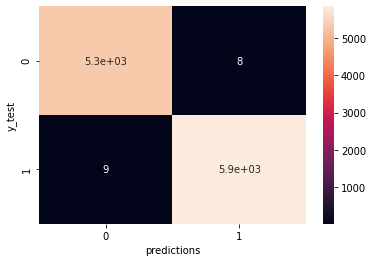

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

Using TFID vectoriser

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df=5).fit(X_train)
len(vect.get_feature_names())

41313

In [ ]:
X_train_vectorized = vect.transform(X_train)

model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

AUC:  0.9922925367503718


In [ ]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5317   36]
 [  51 5818]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5353
           1       0.99      0.99      0.99      5869

    accuracy                           0.99     11222
   macro avg       0.99      0.99      0.99     11222
weighted avg       0.99      0.99      0.99     11222



Text(0.5, 15.0, 'predictions')

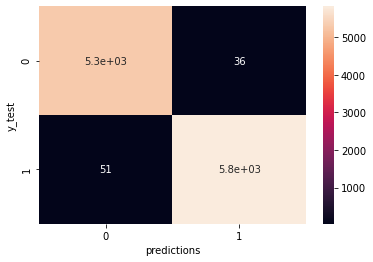

In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

N-gram Analysis

In [ ]:
#ngrams
# Fit the CountVectorizer to the training data specifiying a minimum 
# document frequency of 5 and extracting 1-grams and 2-grams
vect = CountVectorizer(min_df=5, ngram_range=(1,2)).fit(X_train)

X_train_vectorized = vect.transform(X_train)

len(vect.get_feature_names())

347894

In [ ]:
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

predictions = model.predict(vect.transform(X_test))

print('AUC: ', roc_auc_score(y_test, predictions))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



AUC:  0.9985547839963239


In [ ]:
print(metrics.confusion_matrix(y_test, predictions, labels=[0, 1]))
# Printing the precision and recall, among other metrics
print(metrics.classification_report(y_test, predictions, labels=[0, 1]))

[[5343   10]
 [   6 5863]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5353
           1       1.00      1.00      1.00      5869

    accuracy                           1.00     11222
   macro avg       1.00      1.00      1.00     11222
weighted avg       1.00      1.00      1.00     11222



Text(0.5, 15.0, 'predictions')

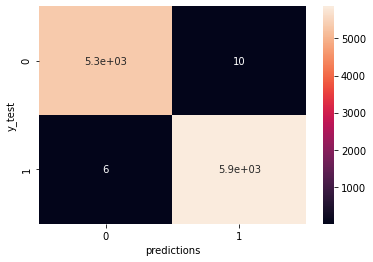

In [ ]:
cm = confusion_matrix(y_test, predictions , labels=[0, 1])

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax= ax)
ax.set_ylabel('y_test')
ax.set_xlabel('predictions')

Now the winner is Logistic Regression with n-gram range 1, 2 for the detection of fake news.